### Tworzenie ramek danych na podstawie zewnętrznych danych

W celu zastosowania większości narzędzi potrzebujemy uzyskać dostęp do danych. Czasami na określenie wczytywania danych tekstowych i interpretowania ich jako tabele lub innego rodzaju informacje jest używany termin parsowanie. Skupimy się na odczycie i zapisie danych za pomocą pakiety pandas, ale istnieje wiele innych bibliotek i narzędzi, które mogą pomóc w obsłudze różnych formatów danych.

W pakiecie pandas zaimplementowano wiele funkcji służących do odczytu danych tabelarycznych i umieszczania ich w obiekcie `DataFrame`. W tabeli wymieniono niektóre z nich.

| Funkcja | Opis |
| --- | --- |
| read_csv | Ładuje dane rozdzielone separatorem z pliku, adresu URL lub obiektu działającego jako plik; domyślnym separatorem jest przecinek |
| read_fwf | Wczytuje dane umieszczone w kolumnach o stałej szerokości (brak separatorów) |
| read_clipboard | Odpowiednik funkcji `read_table` wczytujący dane ze schowka; funkcja ta przydaje się podczas konwersji tabel ze stron internetowych |
| read_excel | Wczytuje dane tabelaryczne z pliku XLS lub XLSX programu Excel |
| read_hdf | Wczytuje pliki HDF5 zapisane za pomocą pakietu pandas |
| read_html | Wczytuje wszystkie tabele znajdujące się w danym dokumencie HTML |
| read_json | Wczytuje dane z łańcucha JSON (JavaScript Object Notation), pliku, adresu URL lub obiektu plikowego |
| read_feather | Wczytuje plik binarny Feather |
| read_orc | Wczytuje plik binarny zapisany w formacie Apache ORC |
| read_parquet | Wczytuje plik binarny zapisany w formacie Apache Parquet |
| read_pickle | Wczytuje plik zapisany w formacie pickle za pomocą biblioteki pandas |
| read_sas | Wczytuje zbiór danych SAS zapisany w jednym z formatów przechowywania danych systemu SAS |
| read_spss | Wczytuje dane utworzone za pomocą programu SPSS (ang. Statistical Package for the Social Science, pakiet statystyczny dla nauk społecznych) |
| read_sql | Wczytuje do obiektu DataFrame wynik zwrócony przez zapytanie SQL (korzysta z biblioteki SQLAlchemy) |
| read_sql_table | Wczytuje całą tabelę SQL przy użyciu pakietu SQLAlchemy. Operacja równoważna użyciu funkcji `read_sql` z zapytaniem odpytującym całą tabelę. |
| read_stata | Wczytuje zbiór danych z formatu pliku programu Stata |
| read_xml | Wczytuje tabelę danych z pliku XML |

Wszystkie powyższe funkcje obsługują dodatkowe parametry, które można podzielić na kategorie:
- Indeksowanie

  Parametry umożliwiające traktowanie jednej lub kilku kolumn jak zwróconej ramki danych, pozwalające na wczytanie nazw kolumn z pliku, podanie ich przez użytkownika lub zrezygnowanie z ich określania.
- Interfejs typu i konwersja danych

  Do tej kategorii można zaliczyć operacje konwersji danych zdefiniowane przez użytkownika, a także obiekty używane do oznaczania brakujących wartości.
- Parsowanie daty i czasu

  Do tej kategorii można zaliczyć między innymi operacje łączenia - w tym łączenia informacji na temat daty i czasu rozrzuconych po wielu kolumnach i zapysywania ich w jednej kolumnie obiektu wyjściowego.
- Iteracja

  Obsługa iteracji po fragmentach dużych plików.
- Rozwiązywanie problemów związanych z nieoczyszczonymi danymi
  
  Pomijanie wierszy, stopek, komentarzy i obsługa wielu drobnych problematycznych rozwiązań, takich jak np. przecinki użyte w celu rozdzielenia tysięcy.

Niektóre z tych funkcji implementują "domniemanie" typu. Wynika to z tego, że typy danych umieszczonych w poszczególnych kolumnach nie wchodzą w skład wielu formatów danych. W związku z tym nie musimy zawsze określać, które kolumny zawierają dane numeryczne, liczby całkowite, wartości logiczne i łańcuchy. Informacje na temat typów danych są przechowywane w niektórych formatach (dotyczy to między innymi formatów HDF5, ORC i Parquet).

Obsługa dat i innych niestandardowych typów może wymagać dodatkowych rozwiązań.

Wiele z funkcji posiada swój odwrotny odpowiednik (zapisanie ramki w wybranym formacie) w metodach ramki.

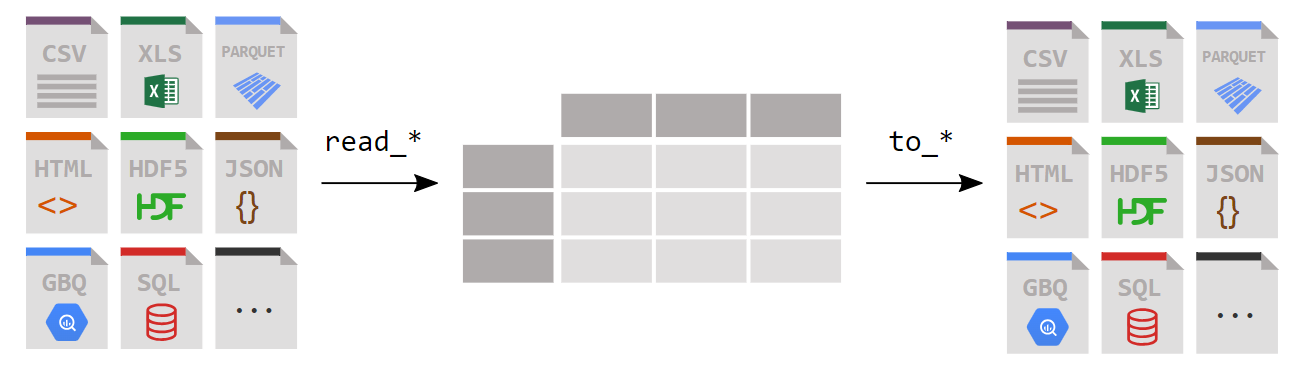

#### Wczytywanie ramek danych z plików csv

In [ ]:
import os

if os.name == 'nt':  # Windows
    !type data\ex1.csv
else:  # Unix/Linux/Mac
    !cat data/ex1.csv

Dane w pliku są rozdzielone przecinkami (domyślny separator funkcji `read_csv`)

In [ ]:
...

W przypadku pliku bez nagłówka istnieje kilka sposobów na jego wczytanie.

Możemy pozwolić bibliotece pandas na przypisanie domyślnych nazw kolumn.

In [ ]:
...

Możemy zdefiniować nagłówki samodzielnie

In [ ]:
...

W celu zapisania ramki w wybranym formacie należy użyć odpowiedniej metody ramki. W przypadku formatu csv będzie to metoda `to_csv`.

In [ ]:
...

Popatrzmy na zadanie `zadania/04_csv.ipynb`.

#### Czytanie arkuszy excelowych

Biblioteka pandas umożliwa wczytywanie tabelarycznych danych zapisanych w plikach programu Excel 2003 i jego nowszych wersjach. Można to zrobić za pomocą klasy `ExcelFile` lub funckji `read_excel`. Wewnętrzenie narzędzia te korzystają z dodatkowego pakietu `openpyxl` (ew. `xlrd` i `xlwr` w zależności od wskazanego engine) umożliwiającego odczyt i zapis plików XLS i XLSX.

**ODCZYT**

In [ ]:
pip install openpyxl

* klasa `ExcelFile`

In [ ]:
...

Za pomocą uzyskanego obiektu można wyświetlić listę arkuszy zawartych w pliku.

In [ ]:
...

Dane zapisane w arkuszu mogą zostać wczytane do ramki w wyniku parsowania.

In [ ]:
...

Widzimy, że pandas podczas wczytywania zawartości stworzyła indeks dla ramki. W `ex2.xlsx` mamy plik z kolumną indeksu.

In [ ]:
...

Do wskazania kolumny z indeksem służy parametr `index_col`.

In [ ]:
...

* funkcja `read_excel`

W przypadku wczytywania wielu arkuszy z pliku utworzenie obiektu `ExcelFile` przebiega szybciej, ale równie dobrze możesz przekazać nazwę pliku z danymi do funkcji `read_excel`.

In [ ]:
...

**ZAPIS**

W celu zapisania danych z ramki w formacie programu Excel wystarczy wywołać metodę `to_excel` ramki.

In [ ]:
data = {
    "a": [1, 5, 9],
    "b": [2, 6, 10],
    "c": [3, 7, 11],
    "d": [4, 8, 12],
    "message": ["hello", "world", "foo"]
}
df_to_save = pd.DataFrame(data)
df_to_save

Metoda `to_save`

In [ ]:
...

Można też to zrobić za posrednictwem obiektu klasy OpenpyxlWriter. W takim przypadku najpierw należy utworzyć egzemplarz `ExcelWriter`, a następnie zapisać w nim dane z obiektu pandas, korzystając z metody `to_excel`.

In [ ]:
...

In [ ]:
...